# Preprocessing

## Data Loading

In [7]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

For the hold-out test, just change the dataframe df and run all the code of this notebook

In [41]:
df = pd.read_csv('consumption_and_temperatures.csv')
display(df.head())
df.shape

,timestamp,NO1_consumption,NO1_temperature,NO2_consumption,NO2_temperature,NO3_consumption,NO3_temperature,NO4_consumption,NO4_temperature,NO5_consumption,NO5_temperature
0,2017-05-01 00:00:00+00:00,3325.431995,2.1,3534.588,5.0,2674.838,5.5,2061.209,0.2,1609.089,3.9
1,2017-05-01 01:00:00+00:00,3344.690998,1.8,3560.209,4.1,2678.188,4.0,2045.436,0.1,1623.485,3.2
2,2017-05-01 02:00:00+00:00,3398.359002,3.2,3596.149,3.1,2678.341,3.7,2020.007,0.1,1634.128,2.7
3,2017-05-01 03:00:00+00:00,3430.220001,3.6,3594.042,2.3,2684.172,3.2,2021.920,0.1,1647.906,2.3
4,2017-05-01 04:00:00+00:00,3606.750000,3.4,3665.091,2.6,2733.345,2.7,2045.913,0.1,1679.176,2.3


(58464, 11)

In [42]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [4]:
df.isnull().sum().sum()


0

We can see that there is no missing value.   
Let's compare the statistics of each area with a more vizualize tool : boxplots

## Data Vizualization

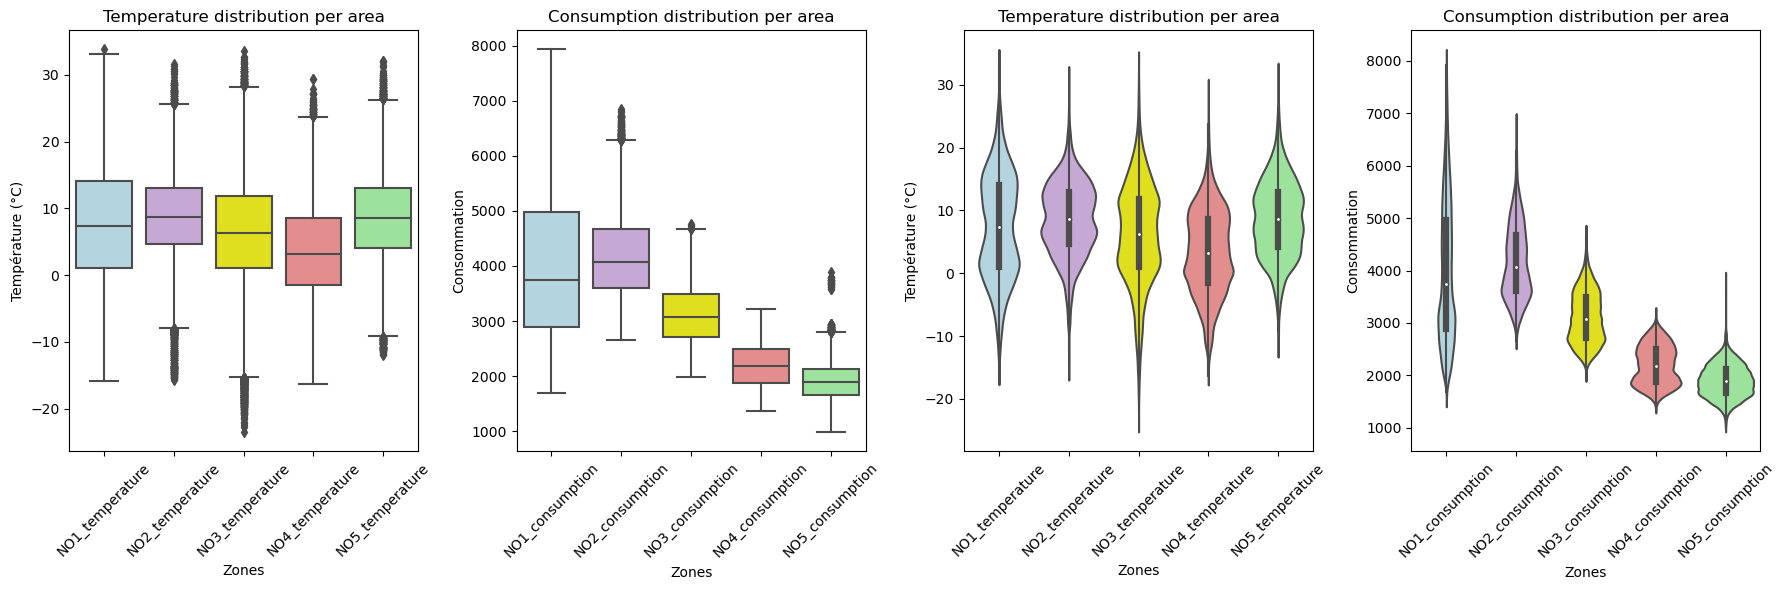

In [5]:
consumption_columns = ['NO1_consumption', 'NO2_consumption', 'NO3_consumption', 'NO4_consumption', 'NO5_consumption']
temperature_columns = ['NO1_temperature', 'NO2_temperature', 'NO3_temperature', 'NO4_temperature', 'NO5_temperature']
zone_colors = {
    'NO1_temperature': 'lightblue',
    'NO1_consumption': 'lightblue',
    'NO2_temperature': '#C9A0DC',
    'NO2_consumption': '#C9A0DC',
    'NO3_temperature': 'yellow',
    'NO3_consumption': 'yellow',
    'NO4_temperature': 'lightcoral',
    'NO4_consumption': 'lightcoral',
    'NO5_temperature': 'lightgreen',
    'NO5_consumption': 'lightgreen'
}

plt.figure(figsize=(18, 6))

# Boxplots for temperatures
plt.subplot(1, 4, 1)
sns.boxplot(data=df[temperature_columns], palette=zone_colors)
plt.title("Temperature distribution per area")
plt.xticks(range(0, len(temperature_columns)), temperature_columns, rotation=45)
plt.xlabel("Zones")
plt.ylabel("Température (°C)")

# Boxplots for consumptions
plt.subplot(1, 4, 2)
sns.boxplot(data=df[consumption_columns], palette=zone_colors)
plt.title("Consumption distribution per area")
plt.xticks(range(0, len(consumption_columns)), consumption_columns, rotation=45)
plt.xlabel("Zones")
plt.ylabel("Consommation")

plt.subplot(1, 4, 3)
sns.violinplot(data=df[temperature_columns], palette=zone_colors)
plt.title("Temperature distribution per area")
plt.xticks(range(0, len(temperature_columns)), temperature_columns, rotation=45)
plt.xlabel("Zones")
plt.ylabel("Température (°C)")

# Boxplots for consumptions
plt.subplot(1, 4, 4)
sns.violinplot(data=df[consumption_columns], palette=zone_colors)
plt.title("Consumption distribution per area")
plt.xticks(range(0, len(consumption_columns)), consumption_columns, rotation=45)
plt.xlabel("Zones")
plt.ylabel("Consommation")

plt.tight_layout()
plt.show()

At first, there is no proof of spikes or outliers in the data. There are some extreme values but they are never alone and seems to make sense. Let's start with keeping all the data for the moment, we will come back here to imporve model later

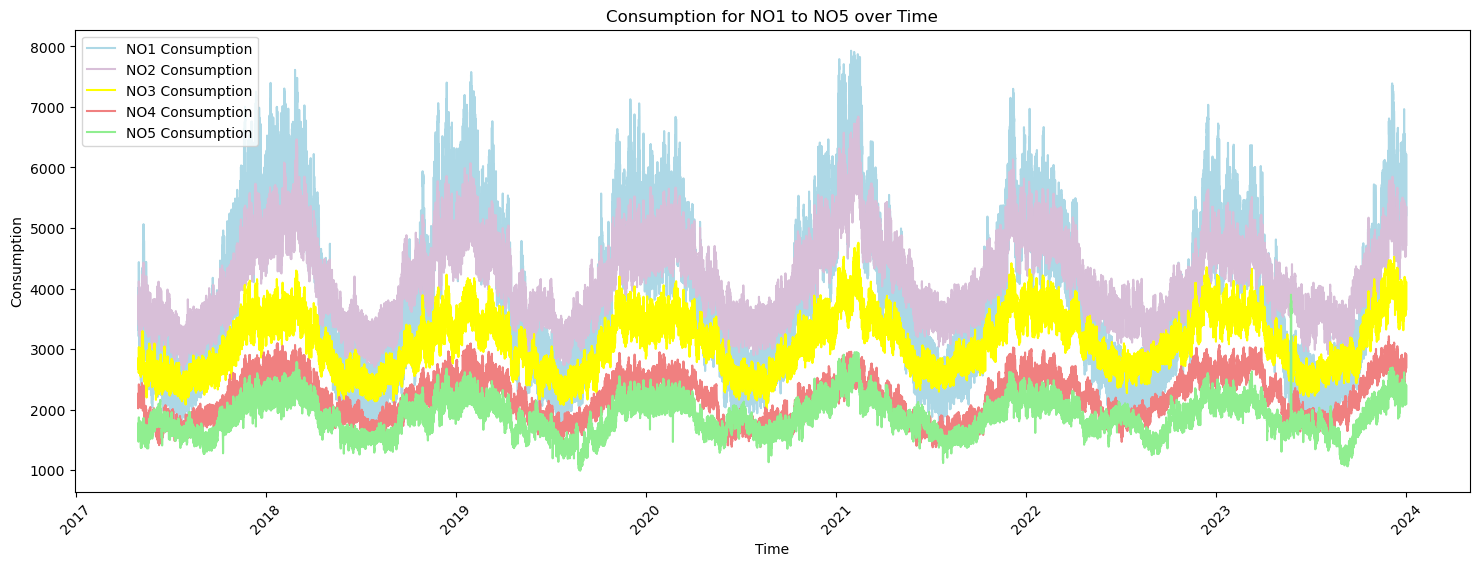

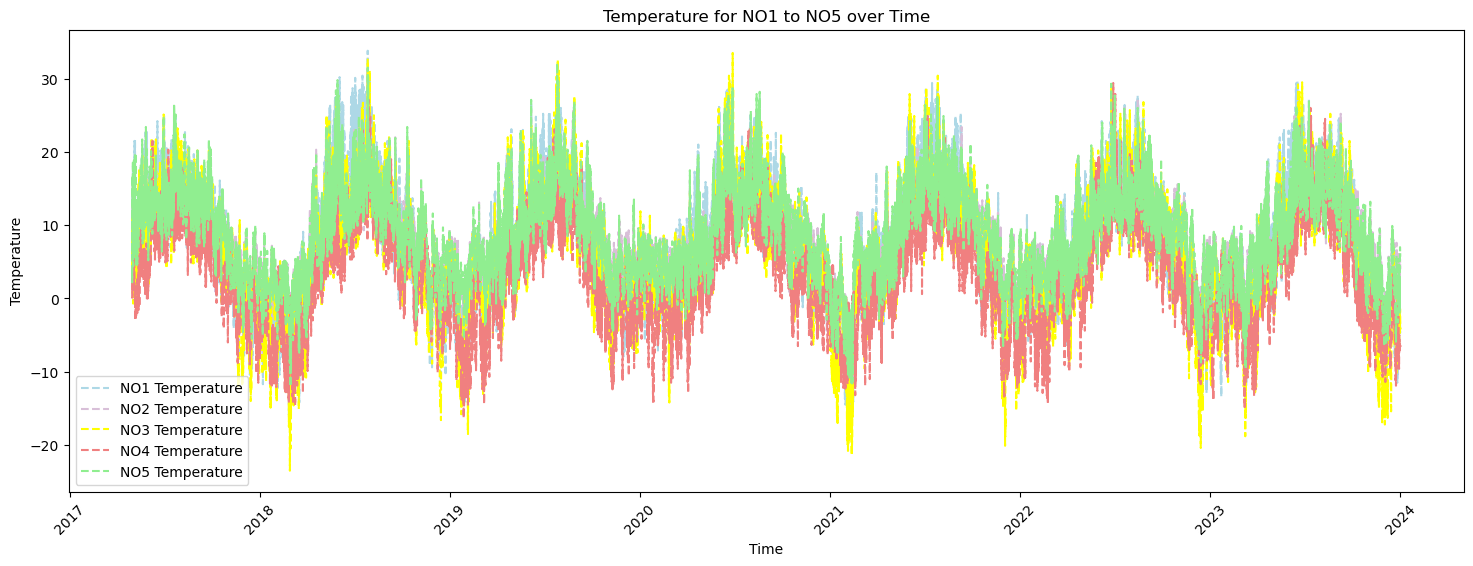

In [6]:
# Configuration des couleurs pour chaque série
colors = {
    'NO1_consumption': 'lightblue',
    'NO2_consumption': 'thistle',  # violet clair
    'NO3_consumption': 'yellow',
    'NO4_consumption': 'lightcoral',  # rouge rosé
    'NO5_consumption': 'lightgreen',
    'NO1_temperature': 'lightblue',
    'NO2_temperature': 'thistle',  # violet clair
    'NO3_temperature': 'yellow',
    'NO4_temperature': 'lightcoral',  # rouge rosé
    'NO5_temperature': 'lightgreen'
}

# Tracer les consommations pour NO1 à NO5
plt.figure(figsize=(18, 6))
for col in ['NO1_consumption', 'NO2_consumption', 'NO3_consumption', 'NO4_consumption', 'NO5_consumption']:
    sns.lineplot(x='timestamp', y=col, data=df, label=col.split('_')[0] + ' Consumption', color=colors[col])
plt.title('Consumption for NO1 to NO5 over Time')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Tracer les températures pour NO1 à NO5
plt.figure(figsize=(18, 6))
for col in ['NO1_temperature', 'NO2_temperature', 'NO3_temperature', 'NO4_temperature', 'NO5_temperature']:
    sns.lineplot(x='timestamp', y=col, data=df, label=col.split('_')[0] + ' Temperature', color=colors[col], linestyle='--')
plt.title('Temperature for NO1 to NO5 over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.legend()
plt.show()



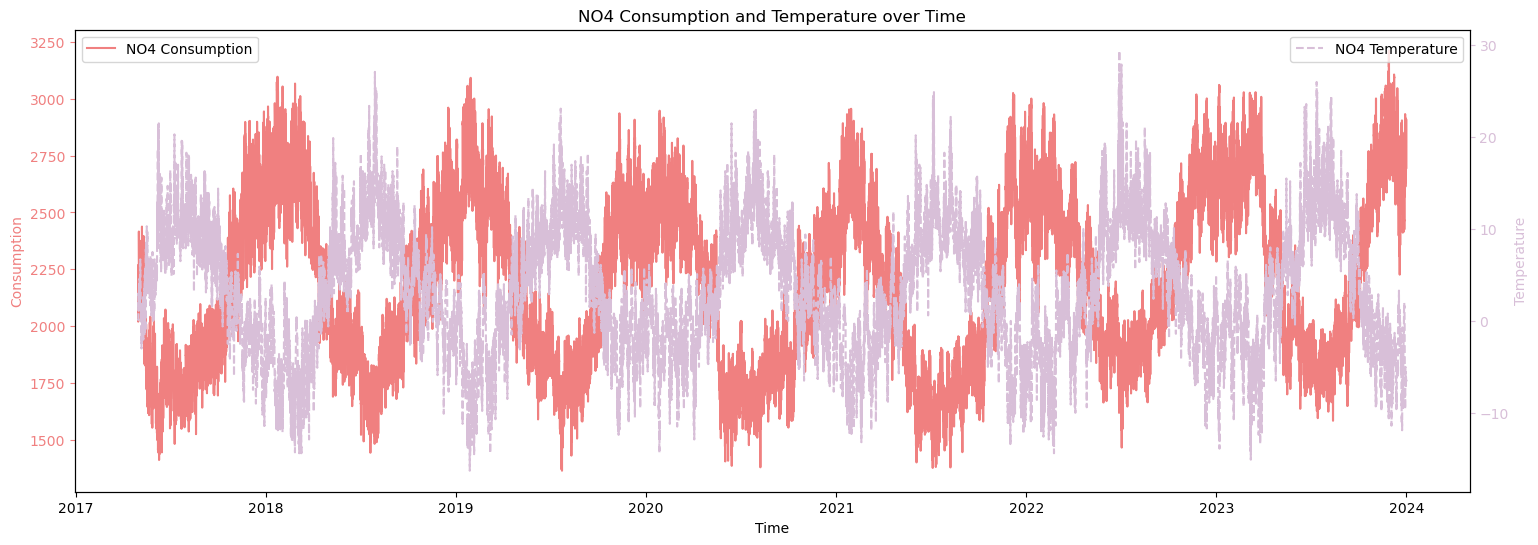

In [7]:
# Configuration du graphique pour NO4 avec deux échelles différentes
plt.figure(figsize=(18, 6))

# Créer le premier axe
ax1 = plt.gca()  # obtenir l'axe actuel
sns.lineplot(x='timestamp', y='NO4_consumption', data=df, label='NO4 Consumption', color='lightcoral', ax=ax1)

# Créer le deuxième axe avec une échelle différente
ax2 = ax1.twinx()  # créer un deuxième axe qui partage le même axe x
sns.lineplot(x='timestamp', y='NO4_temperature', data=df, label='NO4 Temperature', color='thistle', ax=ax2, linestyle='--')

# Personnalisation du graphique
ax1.set_title('NO4 Consumption and Temperature over Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Consumption', color='lightcoral')
ax2.set_ylabel('Temperature', color='thistle')
ax1.tick_params(axis='y', colors='lightcoral')
ax2.tick_params(axis='y', colors='thistle')
plt.xticks(rotation=45)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


Strong visible correlation. Data spikes are common in temperature and consumption, which confirms the strategy of keeping them.  
Consumption seems stationary even though there is a small linear trend starting July 2021

## Adding Month, Day and Hour columns 

In [43]:
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour

df.head()

,timestamp,NO1_consumption,NO1_temperature,NO2_consumption,NO2_temperature,NO3_consumption,NO3_temperature,NO4_consumption,NO4_temperature,NO5_consumption,NO5_temperature,month,day,hour
0,2017-05-01 00:00:00+00:00,3325.431995,2.1,3534.588,5.0,2674.838,5.5,2061.209,0.2,1609.089,3.9,5,1,0
1,2017-05-01 01:00:00+00:00,3344.690998,1.8,3560.209,4.1,2678.188,4.0,2045.436,0.1,1623.485,3.2,5,1,1
2,2017-05-01 02:00:00+00:00,3398.359002,3.2,3596.149,3.1,2678.341,3.7,2020.007,0.1,1634.128,2.7,5,1,2
3,2017-05-01 03:00:00+00:00,3430.220001,3.6,3594.042,2.3,2684.172,3.2,2021.920,0.1,1647.906,2.3,5,1,3
4,2017-05-01 04:00:00+00:00,3606.750000,3.4,3665.091,2.6,2733.345,2.7,2045.913,0.1,1679.176,2.3,5,1,4


## Adding Mean consumption Feature

Indeed, we have to add them now because, after the train val test split, the rolling window calculations would become too complex to call back other datasets, or stack momentaneously two datasets. The easiest way is to do it before the set split, aka here

In [44]:
df.set_index('timestamp', inplace=True)

# Créer les nouvelles colonnes pour chaque 'NOi_consumption'
for i in range(1, 6):

    daily_avg = df[f'NO{i}_consumption'].resample('D').mean()

    # Décaler la moyenne quotidienne pour l'associer à chaque heure du jour suivant
    next_day_avg = daily_avg.shift(1)  # Décale les données d'un jour

    # Étendre la moyenne décalée pour qu'elle corresponde à chaque heure du jour j+1
    # Il faut d'abord reindexer pour s'assurer que nous avons une entrée pour chaque heure
    hourly_next_day_avg = next_day_avg.reindex(df.index, method='ffill')

    # Ajouter la nouvelle caractéristique au DataFrame original
    df[f'NO{i}_consumption_avg_prev_day'] = hourly_next_day_avg

    # Attribuer aux 24 premières entrées la 25e valeur
    df[f'NO{i}_consumption_avg_prev_day'].iloc[:24] = df[f'NO{i}_consumption_avg_prev_day'].iloc[24]

   
    


C:\Users\vadim\AppData\Local\Temp\ipykernel_13372\820917453.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'NO{i}_consumption_avg_prev_day'].iloc[:24] = df[f'NO{i}_consumption_avg_prev_day'].iloc[24]
C:\Users\vadim\AppData\Local\Temp\ipykernel_13372\820917453.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'NO{i}_consumption_avg_prev_day'].iloc[:24] = df[f'NO{i}_consumption_avg_prev_day'].iloc[24]
C:\Users\vadim\AppData\Local\Temp\ipykernel_13372\820917453.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

In [45]:
df.columns

Index(['NO1_consumption', 'NO1_temperature', 'NO2_consumption',
       'NO2_temperature', 'NO3_consumption', 'NO3_temperature',
       'NO4_consumption', 'NO4_temperature', 'NO5_consumption',
       'NO5_temperature', 'month', 'day', 'hour',
       'NO1_consumption_avg_prev_day', 'NO2_consumption_avg_prev_day',
       'NO3_consumption_avg_prev_day', 'NO4_consumption_avg_prev_day',
       'NO5_consumption_avg_prev_day'],
      dtype='object')

## Set separation and Scaling

In [46]:
#Dataframe already sorted by timestamp. In the utlis file, only the train size is defineable, because the test size is imposed by the project (24) and therefore te val size is known

area = 1
test_set_days = 10
train_set_size = 0.8

df_train = df[:int(len(df) * train_set_size)]
df_val = df[int(len(df) * train_set_size):-24*test_set_days]
df_test = df[-24*test_set_days:]

Here is the scaling part, to use with training set to fit the scaler and then apply it to the training set

In [47]:
from sklearn.preprocessing import StandardScaler

# Initialisation du scaler
scaler = StandardScaler()

# Ajuster le scaler sur les données d'entraînement seulement
features = ['NO1_consumption', 'NO1_temperature', 'NO2_consumption', 'NO2_temperature', 'NO3_consumption', 'NO3_temperature', 'NO4_consumption', 'NO4_temperature', 'NO5_consumption', 
            'NO5_temperature', 'month', 'day', 'hour', 'NO1_consumption_avg_prev_day', 'NO2_consumption_avg_prev_day', 'NO3_consumption_avg_prev_day', 'NO4_consumption_avg_prev_day', 'NO5_consumption_avg_prev_day']
scaler.fit(df_train[features])

# Transformer les données
standardized_trainset = scaler.transform(df_train[features]) #numpy array
standardized_valset = scaler.transform(df_val[features]) #numpy array
standardized_testset = scaler.transform(df_test[features]) #numpy array

# Convertir en DataFrame pour une utilisation ultérieure
df_train_scaled = pd.DataFrame(standardized_trainset, columns=features)
df_val_scaled = pd.DataFrame(standardized_valset, columns=features)
df_test_scaled = pd.DataFrame(standardized_testset, columns=features)

In [48]:
display(df_train_scaled.head())
print('STD')
display(df_train_scaled.std())
print('MEAN')
display(df_train_scaled.mean())
print('SHAPE')
df_train_scaled.shape, df_val_scaled.shape, df_test_scaled.shape

,NO1_consumption,NO1_temperature,NO2_consumption,NO2_temperature,NO3_consumption,NO3_temperature,NO4_consumption,NO4_temperature,NO5_consumption,NO5_temperature,month,day,hour,NO1_consumption_avg_prev_day,NO2_consumption_avg_prev_day,NO3_consumption_avg_prev_day,NO4_consumption_avg_prev_day,NO5_consumption_avg_prev_day
0,-0.495719,-0.686809,-0.879311,-0.622815,-0.840593,-0.124657,-0.269720,-0.491554,-0.936903,-0.808543,-0.454382,-1.673862,-1.66126,-0.331902,-0.771886,-0.734938,0.038611,-0.925495
1,-0.481157,-0.723183,-0.843843,-0.774484,-0.833608,-0.317133,-0.313661,-0.506430,-0.890034,-0.923252,-0.454382,-1.673862,-1.51679,-0.331902,-0.771886,-0.734938,0.038611,-0.925495
2,-0.440578,-0.553442,-0.794090,-0.943005,-0.833289,-0.355628,-0.384502,-0.506430,-0.855384,-1.005187,-0.454382,-1.673862,-1.37232,-0.331902,-0.771886,-0.734938,0.038611,-0.925495
3,-0.416487,-0.504944,-0.797007,-1.077822,-0.821132,-0.419787,-0.379173,-0.506430,-0.810527,-1.070734,-0.454382,-1.673862,-1.22785,-0.331902,-0.771886,-0.734938,0.038611,-0.925495
4,-0.283010,-0.529193,-0.698652,-1.027266,-0.718609,-0.483946,-0.312332,-0.506430,-0.708721,-1.070734,-0.454382,-1.673862,-1.08338,-0.331902,-0.771886,-0.734938,0.038611,-0.925495


STD


NO1_consumption                 1.000011
NO1_temperature                 1.000011
NO2_consumption                 1.000011
NO2_temperature                 1.000011
NO3_consumption                 1.000011
NO3_temperature                 1.000011
NO4_consumption                 1.000011
NO4_temperature                 1.000011
NO5_consumption                 1.000011
NO5_temperature                 1.000011
month                           1.000011
day                             1.000011
hour                            1.000011
NO1_consumption_avg_prev_day    1.000011
NO2_consumption_avg_prev_day    1.000011
NO3_consumption_avg_prev_day    1.000011
NO4_consumption_avg_prev_day    1.000011
NO5_consumption_avg_prev_day    1.000011
dtype: float64

MEAN


NO1_consumption                -1.069513e-16
NO1_temperature                -1.215356e-16
NO2_consumption                 3.208540e-16
NO2_temperature                 2.187641e-17
NO3_consumption                 7.097679e-16
NO3_temperature                 8.264421e-17
NO4_consumption                -3.840525e-16
NO4_temperature                 3.402997e-17
NO5_consumption                 7.778279e-17
NO5_temperature                 1.409813e-16
month                          -2.236255e-16
day                             6.198316e-17
hour                            1.271186e-16
NO1_consumption_avg_prev_day    4.132211e-16
NO2_consumption_avg_prev_day   -6.903222e-16
NO3_consumption_avg_prev_day    0.000000e+00
NO4_consumption_avg_prev_day   -4.180825e-16
NO5_consumption_avg_prev_day   -3.402997e-16
dtype: float64

SHAPE


((46771, 18), (11453, 18), (240, 18))

## Adding Columns for consumption 1h and 24 hours before 

Data is time sorted so we can apply rolling mean transformations and previous y as follows :

In [49]:
# Créer les nouvelles colonnes pour chaque 'NOi_consumption'
for i in range(1, 6):
    col_name = f'NO{i}_consumption'

    df_train_scaled[f'{col_name}_1h_before'] = df_train_scaled[col_name].shift(1)
    
    # Consommation 24h avant
    df_train_scaled[f'{col_name}_24h_before'] = df_train_scaled[col_name].shift(24)

# Afficher les nouvelles colonnes pour vérification
display(df_train_scaled[[f'NO{i}_consumption_1h_before' for i in range(1, 6)] + [f'NO{i}_consumption_24h_before' for i in range(1, 6)] + [f'NO{i}_consumption_avg_prev_day' for i in range(1, 6)]].head())  # Affichage des premières lignes pour vérifier les nouvelles colonnes

#Same for df_val_scaled and df_test_scaled

# Pour df_val_scaled
for i in range(1, 6):
    col_name = f'NO{i}_consumption'

    df_val_scaled[f'{col_name}_1h_before'] = df_val_scaled[col_name].shift(1)
    df_val_scaled[f'{col_name}_24h_before'] = df_val_scaled[col_name].shift(24)

# Pour df_test_scaled
for i in range(1, 6):
    col_name = f'NO{i}_consumption'

    df_test_scaled[f'{col_name}_1h_before'] = df_test_scaled[col_name].shift(1)
    df_test_scaled[f'{col_name}_24h_before'] = df_test_scaled[col_name].shift(24)



,NO1_consumption_1h_before,NO2_consumption_1h_before,NO3_consumption_1h_before,NO4_consumption_1h_before,NO5_consumption_1h_before,NO1_consumption_24h_before,NO2_consumption_24h_before,NO3_consumption_24h_before,NO4_consumption_24h_before,NO5_consumption_24h_before,NO1_consumption_avg_prev_day,NO2_consumption_avg_prev_day,NO3_consumption_avg_prev_day,NO4_consumption_avg_prev_day,NO5_consumption_avg_prev_day
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.331902,-0.771886,-0.734938,0.038611,-0.925495
1,-0.495719,-0.879311,-0.840593,-0.269720,-0.936903,NaN,NaN,NaN,NaN,NaN,-0.331902,-0.771886,-0.734938,0.038611,-0.925495
2,-0.481157,-0.843843,-0.833608,-0.313661,-0.890034,NaN,NaN,NaN,NaN,NaN,-0.331902,-0.771886,-0.734938,0.038611,-0.925495
3,-0.440578,-0.794090,-0.833289,-0.384502,-0.855384,NaN,NaN,NaN,NaN,NaN,-0.331902,-0.771886,-0.734938,0.038611,-0.925495
4,-0.416487,-0.797007,-0.821132,-0.379173,-0.810527,NaN,NaN,NaN,NaN,NaN,-0.331902,-0.771886,-0.734938,0.038611,-0.925495


Of course it brings some NaN in the starter lines of the dataframe. Let's just fill them with consumption for the 24h shifted columns, and with the means of the following days for the mean of the previous day columns. It make sense because those values should not be drastically different.

In [50]:
# Remplacer les NaN pour les colonnes de consommation 24h avant et moyenne du jour précédent
for i in range(1, 6):
    col_name = f'NO{i}_consumption'
    col_1h_before = f'{col_name}_1h_before'
    col_24h_before = f'{col_name}_24h_before'

    df_train_scaled[col_1h_before].fillna(df_train_scaled[col_name], inplace=True)
    
    # Remplacer les NaN dans les colonnes 24h_before avec les valeurs actuelles de consommation
    df_train_scaled[col_24h_before].fillna(df_train_scaled[col_name], inplace=True)
    
# Vérifier les résultats après remplacement
display(df_train_scaled[[f'NO{i}_consumption_1h_before' for i in range(1, 6)] + [f'NO{i}_consumption_24h_before' for i in range(1, 6)] + [f'NO{i}_consumption_avg_prev_day' for i in range(1, 6)]].head())  # Affichage des premières lignes pour vérifier les nouvelles colonnes

#Same vor df_val_scaled and df_test_scaled

# Pour df_val_scaled
for i in range(1, 6):
    col_name = f'NO{i}_consumption'
    col_1h_before = f'{col_name}_1h_before'
    col_24h_before = f'{col_name}_24h_before'

    df_val_scaled[col_1h_before].fillna(df_val_scaled[col_name], inplace=True)
    df_val_scaled[col_24h_before].fillna(df_val_scaled[col_name], inplace=True)
    
    # Calcul des moyennes du jour suivant pour les données de validation

# Pour df_test_scaled
for i in range(1, 6):
    col_name = f'NO{i}_consumption'
    col_1h_before = f'{col_name}_1h_before'
    col_24h_before = f'{col_name}_24h_before'

    df_test_scaled[col_1h_before].fillna(df_test_scaled[col_name], inplace=True)
    df_test_scaled[col_24h_before].fillna(df_test_scaled[col_name], inplace=True)
    
    # Calcul des moyennes du jour suivant pour les données de test


,NO1_consumption_1h_before,NO2_consumption_1h_before,NO3_consumption_1h_before,NO4_consumption_1h_before,NO5_consumption_1h_before,NO1_consumption_24h_before,NO2_consumption_24h_before,NO3_consumption_24h_before,NO4_consumption_24h_before,NO5_consumption_24h_before,NO1_consumption_avg_prev_day,NO2_consumption_avg_prev_day,NO3_consumption_avg_prev_day,NO4_consumption_avg_prev_day,NO5_consumption_avg_prev_day
0,-0.495719,-0.879311,-0.840593,-0.269720,-0.936903,-0.495719,-0.879311,-0.840593,-0.269720,-0.936903,-0.331902,-0.771886,-0.734938,0.038611,-0.925495
1,-0.495719,-0.879311,-0.840593,-0.269720,-0.936903,-0.481157,-0.843843,-0.833608,-0.313661,-0.890034,-0.331902,-0.771886,-0.734938,0.038611,-0.925495
2,-0.481157,-0.843843,-0.833608,-0.313661,-0.890034,-0.440578,-0.794090,-0.833289,-0.384502,-0.855384,-0.331902,-0.771886,-0.734938,0.038611,-0.925495
3,-0.440578,-0.794090,-0.833289,-0.384502,-0.855384,-0.416487,-0.797007,-0.821132,-0.379173,-0.810527,-0.331902,-0.771886,-0.734938,0.038611,-0.925495
4,-0.416487,-0.797007,-0.821132,-0.379173,-0.810527,-0.283010,-0.698652,-0.718609,-0.312332,-0.708721,-0.331902,-0.771886,-0.734938,0.038611,-0.925495


In [51]:
df_train_scaled.columns

Index(['NO1_consumption', 'NO1_temperature', 'NO2_consumption',
       'NO2_temperature', 'NO3_consumption', 'NO3_temperature',
       'NO4_consumption', 'NO4_temperature', 'NO5_consumption',
       'NO5_temperature', 'month', 'day', 'hour',
       'NO1_consumption_avg_prev_day', 'NO2_consumption_avg_prev_day',
       'NO3_consumption_avg_prev_day', 'NO4_consumption_avg_prev_day',
       'NO5_consumption_avg_prev_day', 'NO1_consumption_1h_before',
       'NO1_consumption_24h_before', 'NO2_consumption_1h_before',
       'NO2_consumption_24h_before', 'NO3_consumption_1h_before',
       'NO3_consumption_24h_before', 'NO4_consumption_1h_before',
       'NO4_consumption_24h_before', 'NO5_consumption_1h_before',
       'NO5_consumption_24h_before'],
      dtype='object')

In [52]:
df_train_scaled.isna().sum().sum(), df_val_scaled.isna().sum().sum(), df_test_scaled.isna().sum().sum()

(0, 0, 0)

## Area Specification

specified in preprocessing with the argument area

In [53]:
df4_train = df_train_scaled[['NO4_consumption', 'NO4_temperature', 'NO4_consumption_1h_before', 'NO4_consumption_24h_before', 'NO4_consumption_avg_prev_day','month', 'day', 'hour']]
df4_val = df_val_scaled[['NO4_consumption', 'NO4_temperature', 'NO4_consumption_1h_before', 'NO4_consumption_24h_before', 'NO4_consumption_avg_prev_day','month', 'day', 'hour']]
df4_test = df_test_scaled[['NO4_consumption', 'NO4_temperature', 'NO4_consumption_1h_before', 'NO4_consumption_24h_before', 'NO4_consumption_avg_prev_day','month', 'day', 'hour']]

In [54]:
X4_train = df4_train.drop('NO4_consumption', axis=1)  
y4_train = df4_train['NO4_consumption']

X4_val = df4_val.drop('NO4_consumption', axis=1)  
y4_val = df4_val['NO4_consumption']

X4_test = df4_test.drop('NO4_consumption', axis=1)  
y4_test = df4_test['NO4_consumption']

He have added some features but we could have added way more ! Here are some ideas that could be new variables :

<span style="color: red;">Warning : will not work with hold-out set test</span>

Seasonal patterns : Let's also create columns that are free of seasonal patterns, for example let's create : 
* a columns consumption 1 year/monht before, 1 month before
* Variables Dummy of seasonality/important events(holidays)
* Rolling mean columns 

# Conclusion

Global Mean Error for Feed Forward model = 1432.7967097546873  
Global Mean Error for LSTM = 0.34768314080988755  
Global Mean Error for CNN = 1.6300820744224715  

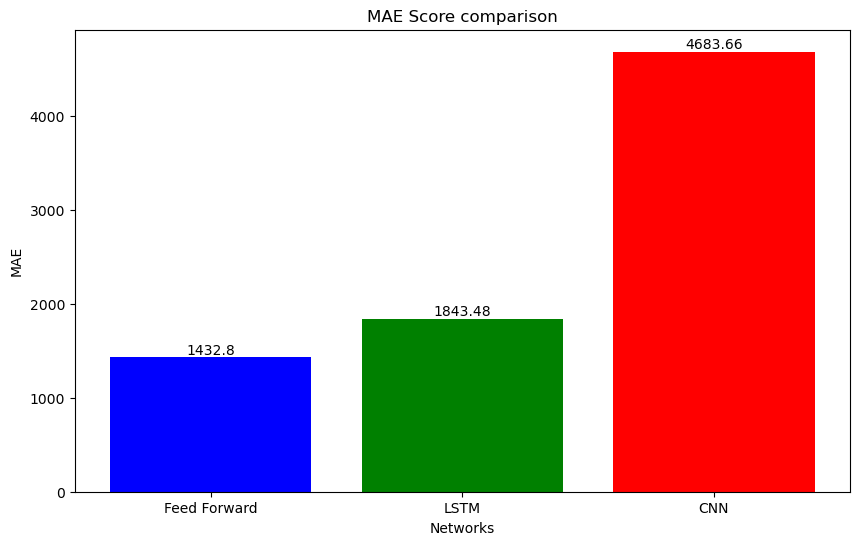

In [55]:
# Noms des modèles
models = ['Feed Forward', 'LSTM', 'CNN']

# Scores MAE pour chaque modèle
mae_scores = [1432.7967097546873, 1843.4830290948403, 4683.658347507612]

# Création du graphique en barres
plt.figure(figsize=(10, 6))
plt.bar(models, mae_scores, color=['blue', 'green', 'red'])

# Ajout de titres et d'étiquettes
plt.title('MAE Score comparison')
plt.xlabel('Networks')
plt.ylabel('MAE')

# Afficher les valeurs MAE sur les barres
for i, v in enumerate(mae_scores):
    plt.text(i, v + 0.1, str(round(v, 2)), ha='center', va='bottom')

# Afficher le graphique
plt.show()

* Feed forward with less features worked better (now last score over 4000)
* Good learning for LSTM, I would have like to try more layers and neurons. Increasing error through hour. However, tends to smooth the predictions
* Depends strongly on look_back

PS : did not add neither dropout nor regularization bc there were no sign of overfitting.